<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230309.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [18]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'scanner_data.csv',
 'cookie_cats.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'ab_experiment.csv',
 'match_result_test.csv',
 'groceries.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'bz_data_analyis.csv',
 'sales.csv',
 '1_order_payments_dataset.csv',
 'ecommerce-data.csv',
 'online_retail.xlsx',
 'sales_vs_discount.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 'lead_conversion.csv',
 'mall_customers.csv',
 'sample-sales-data.csv',
 'sales_data_with_stores.csv',
 'test.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'app_wau.csv',
 '1_customers_dataset.csv',
 'sample_data']

In [3]:
df = pd.read_csv('KPMG_VI_New_raw_data_update_final.csv')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25-02-2017,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,21-05-2017,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,16-10-2017,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,31-08-2017,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,01-10-2017,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
df.transaction_date = pd.to_datetime(df.transaction_date)
df['week'] = df.transaction_date - df.transaction_date.dt.weekday.astype('timedelta64[D]')
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,week
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-20
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-15
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-28
4,5,78,787,2017-01-10,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-01-09


In [36]:
cnt = df.groupby(['week','order_status','online_order'])['transaction_id'].count().reset_index(name = 'cnt')
cnt['flag'] = [f'{a}_o' if b == True else f'{a}_x' for a, b in zip(cnt['order_status'], cnt['online_order'])]
cnt['week'] = df['week'].dt.date
cnt['ratio'] = cnt.groupby(['week','online_order'])['cnt'].apply(lambda x : round(x/sum(x)*100,2))
cnt.head()

,week,order_status,online_order,cnt,flag,ratio
0,2017-02-20,Approved,False,29,Approved_x,4.92
1,2017-05-15,Approved,True,23,Approved_o,11.39
2,2017-10-16,Cancelled,False,1,Cancelled_x,0.17
3,2017-08-28,Cancelled,True,1,Cancelled_o,0.17
4,2017-01-09,Approved,False,174,Approved_x,45.43


In [29]:
cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   week          189 non-null    object
 1   order_status  189 non-null    object
 2   online_order  189 non-null    bool  
 3   cnt           189 non-null    int64 
 4   flag          189 non-null    object
dtypes: bool(1), int64(1), object(3)
memory usage: 6.2+ KB


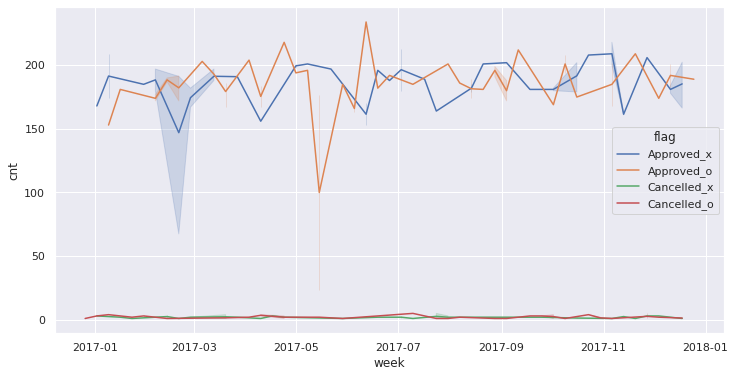

In [33]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.lineplot(data = cnt, x = 'week', y = 'cnt', hue = 'flag')
plt.show()

<AxesSubplot:xlabel='week', ylabel='ratio'>

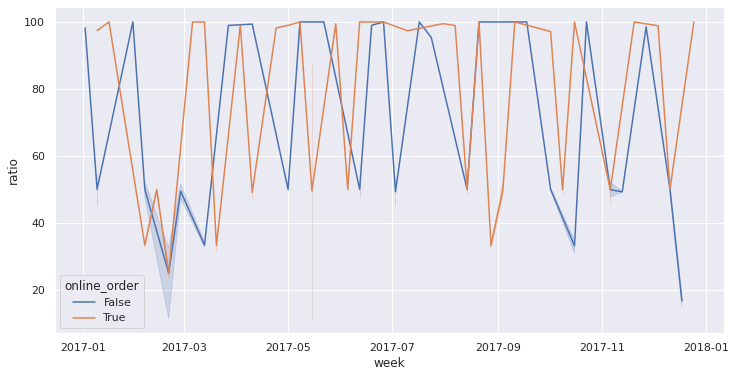

In [41]:
sns.lineplot(data = cnt[cnt['order_status'] == 'Approved'], x = 'week', y = 'ratio', hue = 'online_order')

In [44]:
rev = df.groupby(['week','online_order','order_status'])['list_price'].sum().reset_index(name = 'rev')
rev['week'] = rev['week'].dt.date
rev['ratio'] = rev.groupby(['week','online_order'])['rev'].apply(lambda x : round(x/sum(x)*100,2))
rev.head()

,week,online_order,order_status,rev,ratio
0,2016-12-26,False,Approved,32232.20,96.20
1,2016-12-26,False,Cancelled,1274.93,3.80
2,2016-12-26,True,Approved,23981.61,94.18
3,2016-12-26,True,Cancelled,1483.20,5.82
4,2017-01-02,False,Approved,190418.19,98.48


<AxesSubplot:xlabel='week', ylabel='ratio'>

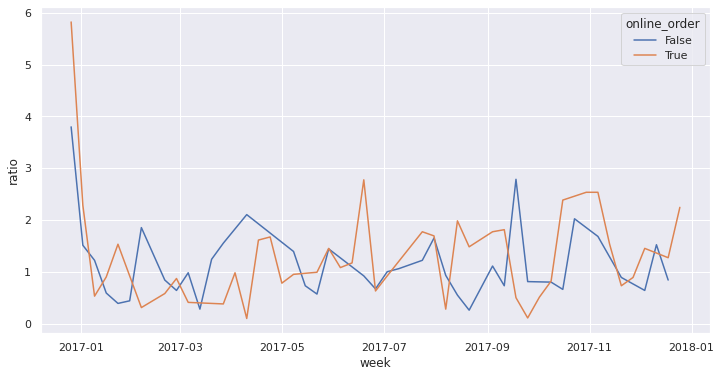

In [45]:
sns.lineplot(data = rev[rev['order_status'] == 'Cancelled'], x = 'week', y = 'ratio', hue = 'online_order')

# Iterators

In [46]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [47]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}